In [9]:
using Clustering, RDatasets, Plots

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


In [2]:
X = rand(5,1000)

5×1000 Array{Float64,2}:
 0.870778  0.0781792  0.911333  0.475157   …  0.969444   0.644156   0.29819
 0.497586  0.684684   0.103762  0.680188      0.233444   0.279353   0.662529
 0.67031   0.853115   0.808876  0.845073      0.0293174  0.456337   0.307882
 0.279177  0.757617   0.618664  0.0513585     0.162142   0.0232313  0.379137
 0.920515  0.410031   0.634814  0.104064      0.859088   0.768183   0.383401

In [3]:
R = kmeans(X, 20, maxiter=200, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.935429e+02
      1       1.473911e+02      -4.615186e+01 |       20
      2       1.384860e+02      -8.905117e+00 |       20
      3       1.349065e+02      -3.579418e+00 |       20
      4       1.329129e+02      -1.993692e+00 |       20
      5       1.315874e+02      -1.325452e+00 |       18
      6       1.309600e+02      -6.274377e-01 |       16
      7       1.304813e+02      -4.786464e-01 |       17
      8       1.299798e+02      -5.015398e-01 |       17
      9       1.294188e+02      -5.609620e-01 |       18
     10       1.289059e+02      -5.129582e-01 |       18
     11       1.282902e+02      -6.156560e-01 |       18
     12       1.277249e+02      -5.652883e-01 |       16
     13       1.274684e+02      -2.565533e-01 |       16
     14       1.273283e+02      -1.400475e-01 |       15
     15       1.271887e+02      -1.395970e-01 |       1

KmeansResult{Array{Float64,2},Float64,Int64}([0.26469571611842435 0.2956980599713237 … 0.38726236393275987 0.7489409734643422; 0.32709081063082107 0.2207124356078412 … 0.7655131254889088 0.6359100138085257; … ; 0.7245622143152702 0.19493571318949335 … 0.23006033876094167 0.243535093543871; 0.7491167089194438 0.2572542548118997 … 0.12838393561722727 0.7550810506537192], [18, 11, 17, 19, 4, 11, 7, 5, 19, 12  …  13, 12, 4, 4, 6, 8, 1, 20, 9, 7], [0.11732840296537361, 0.09054488383484349, 0.09695837871231738, 0.04929852888429487, 0.1341261198710293, 0.05088416463367329, 0.12251077479168915, 0.05044317214697447, 0.21091590722710674, 0.09432809782558138  …  0.1639813215341701, 0.09782939612957886, 0.10413738063884725, 0.17238136870910425, 0.11790318540915257, 0.09485112075264679, 0.113811136244923, 0.2756687306830061, 0.21416332601559462, 0.04313982426595553], [60, 47, 52, 52, 48, 45, 47, 36, 43, 52, 45, 52, 53, 57, 50, 58, 48, 54, 42, 59], [60, 47, 52, 52, 48, 45, 47, 36, 43, 52, 45, 52, 53

In [6]:
@assert nclusters(R) == 20

In [7]:
a = assignments(R)
c = counts(R)
M = R.centers

5×20 Array{Float64,2}:
 0.264696  0.295698  0.23581   0.777515  …  0.778645  0.387262  0.748941
 0.327091  0.220712  0.65909   0.548661     0.53958   0.765513  0.63591
 0.223801  0.347274  0.197131  0.237074     0.76658   0.803037  0.247551
 0.724562  0.194936  0.246496  0.226525     0.199896  0.23006   0.243535
 0.749117  0.257254  0.749518  0.241099     0.617988  0.128384  0.755081

In [10]:
iris = dataset("datasets", "iris");

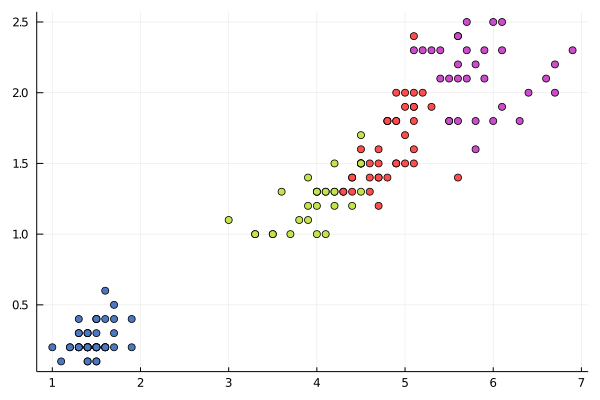

In [14]:
features = collect(Matrix(iris[:, 1:4])');
result = kmeans(features, 4);
scatter(iris.PetalLength, iris.PetalWidth, marker_z=result.assignments,
        color=:lightrainbow, legend=false)

In [12]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
